# NFL All Day: Analyzing Market Pricing

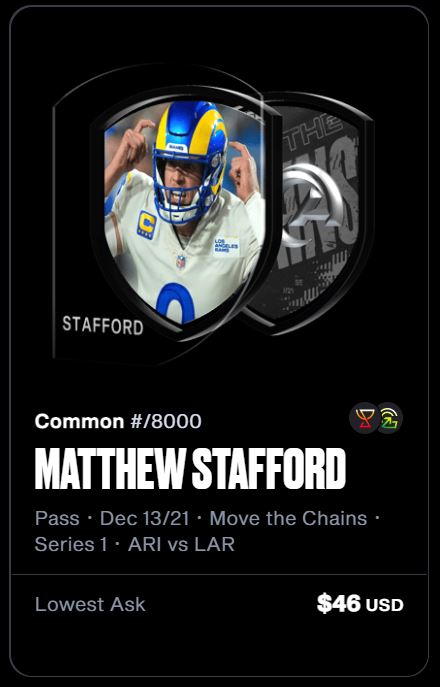

In [122]:
from IPython.display import Image
Image("allday_moment.JPG")

## Install dependencies

In [123]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load data set

*Data is sourced from Own the Moment which is a third-party platform providing data analytics and additional functionality for products created by Dapper Labs. This data set focuses on the NFL All Day product, which is a collection of digital highlights (referenced as “Moments”) from the National Football League tokenized for fans to collect through buy, sell, and trade.  The data used for this analysis was recorded at 12:18 pm Eastern Time on September 2nd 2022 and consists of every “Moment” available on the official NFL All Day marketplace. Some important features include Player’s Name and Position, Lowest Asking Price, Rarity Tier, and Special attributes such as Rookie or Championship Year Badge.
You can access the current version of the data set here which is dynamically updated:*
https://www.otmnft.com/nflallday/market/moments

In [125]:
raw_data = pd.read_csv("nflallday_moments_20220902.csv")

# Questions and Objectives

**What features if any, contribute to higher priced collectibles on the NFL All Day marketplace?**

**Objective: Establish a basline understanding of how value is determined on the marketplace.**

## Pre-processing

**I'll start of by looking at the first few lines of my data set, identify all the features currently present, any null values, and data types.**

In [126]:
raw_data.head()

,Time Stamp (EST),User Owns Count,Player Name,Set,Tier,Series,Play,Team,Week,Season,...,Listings,All Day Debut,Rookie Mint,Rookie Year,Championship Year,Edition State,Play ID,Set ID,Link,Favorite
0,2022-02-20 13:19,0,Jerick McKinnon,Super Wild Card Weekend,Common,Series 1,Player Melt,Kansas City Chiefs,19,2021,...,0,False,False,False,False,DRAFT,cac1b4c5-06e8-4bc1-9487-999e55016a1e,18,https://marketplace.nflallday.com/edition/751,False
1,2022-02-20 05:50,0,Tyler Boyd,Locked In,Rare,Series 1,Reception,Cincinnati Bengals,15,2021,...,0,True,False,False,False,DRAFT,f14860e9-625b-4de5-b0c3-8bb28175608e,3,https://marketplace.nflallday.com/edition/517,False
2,2022-09-02 12:07,1,Olamide Zaccheaus,Base,Common,Series 1,Reception,Atlanta Falcons,13,2021,...,409,True,False,False,False,DRAFT,f1be36f4-974b-43aa-935f-0a28d81e15f2,2,https://marketplace.nflallday.com/edition/353,False
3,2022-09-02 12:08,1,Cyril Grayson,Base,Common,Series 1,Reception,Tampa Bay Buccaneers,16,2021,...,517,True,False,False,False,DRAFT,5658f5ce-bb39-4c94-8256-c6a08f024780,2,https://marketplace.nflallday.com/edition/574,False
4,2022-09-02 12:08,0,P.J. Williams,Base,Common,Series 1,Strip Sack,New Orleans Saints,17,2021,...,334,True,False,False,False,DRAFT,9f61cdab-15cd-42a7-a4d4-e44638d8f043,2,https://marketplace.nflallday.com/edition/633,False


In [127]:
raw_data.columns

Index(['Time Stamp (EST)', 'User Owns Count', 'Player Name', 'Set', 'Tier',
       'Series', 'Play', 'Team', 'Week', 'Season', 'Jersey Number', 'Position',
       'Circulation Count', 'Owned', 'In Packs', 'Minted', 'Burned', 'Low Ask',
       '4h', '24h', '7d', 'Volume 24h', 'Volume 7d', 'Listings',
       'All Day Debut', 'Rookie Mint', 'Rookie Year', 'Championship Year',
       'Edition State', 'Play ID', 'Set ID', 'Link', 'Favorite'],
      dtype='object')

In [128]:
raw_data.isnull().sum()

Time Stamp (EST)      0
User Owns Count       0
Player Name           0
Set                   0
Tier                  0
Series                0
Play                  0
Team                  0
Week                  0
Season                0
Jersey Number        49
Position              0
Circulation Count     0
Owned                 0
In Packs              0
Minted                0
Burned                0
Low Ask               0
4h                    0
24h                   0
7d                    0
Volume 24h            0
Volume 7d             0
Listings              0
All Day Debut         0
Rookie Mint           0
Rookie Year           0
Championship Year     0
Edition State         0
Play ID               0
Set ID                0
Link                  0
Favorite              0
dtype: int64

In [131]:
raw_data.dtypes

Time Stamp (EST)      object
User Owns Count        int64
Player Name           object
Set                   object
Tier                  object
Series                object
Play                  object
Team                  object
Week                  object
Season                 int64
Position              object
Circulation Count      int64
Owned                  int64
In Packs               int64
Minted                 int64
Burned                 int64
Low Ask              float64
4h                   float64
24h                  float64
7d                   float64
Volume 24h             int64
Volume 7d              int64
Listings               int64
All Day Debut           bool
Rookie Mint             bool
Rookie Year             bool
Championship Year       bool
Edition State         object
Play ID               object
Set ID                 int64
Link                  object
Favorite                bool
dtype: object

In [129]:
raw_data['Jersey Number'].head()

0     1.0
1    83.0
2    17.0
3    15.0
4    26.0
Name: Jersey Number, dtype: float64

**Each row represents a specific collectible ("Moment") which has a 'Circulation Count'. The 'Jersey Number' attribute would be useful in matching a player's jersey number to the number within the Circulation Count. Since this level of Analysis is broader than what the 'Jersey Number' benefits, I will remove that column**

In [130]:
raw_data.drop('Jersey Number', axis=1, inplace=True)
raw_data.columns

Index(['Time Stamp (EST)', 'User Owns Count', 'Player Name', 'Set', 'Tier',
       'Series', 'Play', 'Team', 'Week', 'Season', 'Position',
       'Circulation Count', 'Owned', 'In Packs', 'Minted', 'Burned', 'Low Ask',
       '4h', '24h', '7d', 'Volume 24h', 'Volume 7d', 'Listings',
       'All Day Debut', 'Rookie Mint', 'Rookie Year', 'Championship Year',
       'Edition State', 'Play ID', 'Set ID', 'Link', 'Favorite'],
      dtype='object')

In [1]:
raw_data.describe()

NameError: name 'raw_data' is not defined

## Dropping Irrelevant Columns

**Observing the features in the describe table, I notice some columns that can be dropped along with others not included.
They are as follows:**

    -'User Owns Count' simply tracks a users collection and is not relevant to the market.
    -'4h', '24h', and '7d' are tracking the price movement over time. Since I am exploring price variation in respect to 
    other  Moments available and not in relation to time, I will also remove these columns. 
    - I will however keep the volume columns as these may be used as additional characteristics.
    - 'Set ID' will be removed since the "Set" characteristic is already accounted for in the 'Set' column
    - 'Play ID' and 'Link' are references and provide no additional measure of analysis, so they will be dropped
    - 'Favorite' is another collection tool specific to individual users and not relevant to the market.

In [133]:
raw_data.drop(['User Owns Count','4h','24h','7d','Set ID','Play ID','Link','Favorite'], axis=1, inplace=True)
raw_data.columns

Index(['Time Stamp (EST)', 'Player Name', 'Set', 'Tier', 'Series', 'Play',
       'Team', 'Week', 'Season', 'Position', 'Circulation Count', 'Owned',
       'In Packs', 'Minted', 'Burned', 'Low Ask', 'Volume 24h', 'Volume 7d',
       'Listings', 'All Day Debut', 'Rookie Mint', 'Rookie Year',
       'Championship Year', 'Edition State'],
      dtype='object')

**Now I want to revist the describe table to see if there is anything else strange to clean up**

In [135]:
raw_data.describe()

,Season,Circulation Count,Owned,In Packs,Minted,Burned,Low Ask,Volume 24h,Volume 7d,Listings,All Day Debut,Rookie Mint,Rookie Year,Championship Year
count,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000,665.000000
mean,2018.530827,4890.527820,3354.664662,621.819549,911.935338,2.108271,622.813534,18.661654,46.609023,187.036090,0.669173,0.117293,0.135338,0.070677
std,6.971286,4243.974086,2912.685993,553.268522,1349.530588,13.749053,2675.850523,80.744735,87.304863,171.354065,0.470865,0.322012,0.342342,0.256477
min,1979.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,799.000000,681.000000,104.000000,0.000000,0.000000,7.000000,1.000000,6.000000,48.000000,0.000000,0.000000,0.000000,0.000000
50%,2021.000000,6000.000000,3368.000000,623.000000,0.000000,0.000000,41.000000,5.000000,31.000000,140.000000,1.000000,0.000000,0.000000,0.000000
75%,2021.000000,10000.000000,6020.000000,1153.000000,2174.000000,0.000000,155.000000,11.000000,56.000000,290.000000,1.000000,0.000000,0.000000,0.000000
max,2021.000000,10000.000000,8753.000000,1759.000000,8500.000000,108.000000,41313.000000,813.000000,813.000000,908.000000,1.000000,1.000000,1.000000,1.000000


**There is a minimum asking price of 0.0 which doesn't make much sense.Let's look closer at those moments**

## Altering Badge Columns

**'All Day Debut' 'Rookie Mint' 'Rookie Year' and 'Championship Year' are all special attributes that indicate if a particular moment has the respective badge. In order to perform a price regression analysis, I will replace their boolean data type columns with dummy columns.** 

In [134]:
raw_data['All Day Debut'] = raw_data['All Day Debut'].apply(lambda x: 1 if x==True else 0)
raw_data['Rookie Mint'] = raw_data['Rookie Mint'].apply(lambda x: 1 if x==True else 0)
raw_data['Rookie Year'] = raw_data['Rookie Year'].apply(lambda x: 1 if x==True else 0)
raw_data['Championship Year'] = raw_data['Championship Year'].apply(lambda x: 1 if x==True else 0)
raw_data[['All Day Debut', 'Rookie Mint', 'Rookie Year', 'Championship Year']]

,All Day Debut,Rookie Mint,Rookie Year,Championship Year
0,0,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
660,0,0,0,0
661,1,0,0,0
662,0,0,0,0
663,0,0,0,0


In [136]:
raw_data[raw_data['Low Ask']==0.0]

,Time Stamp (EST),Player Name,Set,Tier,Series,Play,Team,Week,Season,Position,...,Burned,Low Ask,Volume 24h,Volume 7d,Listings,All Day Debut,Rookie Mint,Rookie Year,Championship Year,Edition State
0,2022-02-20 13:19,Jerick McKinnon,Super Wild Card Weekend,Common,Series 1,Player Melt,Kansas City Chiefs,19,2021,RB,...,0,0.0,0,0,0,0,0,0,0,DRAFT
1,2022-02-20 05:50,Tyler Boyd,Locked In,Rare,Series 1,Reception,Cincinnati Bengals,15,2021,WR,...,0,0.0,0,0,0,1,0,0,0,DRAFT


**There are two moments in the dataset with a low ask of 0.0. There are also no listings for those moments in the marketplace which means they are not actually available and can be thrown out for this analysis.**

In [137]:
raw_data = raw_data.drop([0,1])
raw_data

,Time Stamp (EST),Player Name,Set,Tier,Series,Play,Team,Week,Season,Position,...,Burned,Low Ask,Volume 24h,Volume 7d,Listings,All Day Debut,Rookie Mint,Rookie Year,Championship Year,Edition State
2,2022-09-02 12:07,Olamide Zaccheaus,Base,Common,Series 1,Reception,Atlanta Falcons,13,2021,WR,...,0,3.0,7,60,409,1,0,0,0,DRAFT
3,2022-09-02 12:08,Cyril Grayson,Base,Common,Series 1,Reception,Tampa Bay Buccaneers,16,2021,WR,...,0,3.0,18,82,517,1,0,0,0,DRAFT
4,2022-09-02 12:08,P.J. Williams,Base,Common,Series 1,Strip Sack,New Orleans Saints,17,2021,DB,...,0,3.0,18,65,334,1,0,0,0,DRAFT
5,2022-09-02 12:08,Taylor Heinicke,Base,Common,Series 1,Rush,Washington Football Team,3,2021,QB,...,0,3.0,20,127,210,1,0,0,0,DRAFT
6,2022-09-02 12:07,Kamu Grugier-Hill,Base,Common,Series 1,Sack,Houston Texans,13,2021,LB,...,0,4.0,2,46,500,1,0,0,0,DRAFT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660,2022-09-02 12:08,Patrick Mahomes II,Super Wild Card Weekend,Legendary,Series 1,Player Melt,Kansas City Chiefs,19,2021,QB,...,0,9999.0,1,1,18,0,0,0,0,DRAFT
661,2022-09-02 12:08,Tampa Bay Buccaneers,What a Drive,Legendary,Series 1,Team Melt,Tampa Bay Buccaneers,17,2021,Team,...,0,11600.0,0,0,11,1,0,0,0,DRAFT
662,2022-09-02 12:08,Tom Brady,What a Drive,Legendary,Series 1,Player Melt,Tampa Bay Buccaneers,1,2021,QB,...,0,19500.0,0,0,8,0,0,0,0,DRAFT
663,2022-09-02 12:08,Brett Favre,Marquee,Ultimate,Historical,Player Melt,Green Bay Packers,16,2003,QB,...,0,41000.0,0,0,4,0,0,0,0,DRAFT


# Visualizing and Understanding

**To better visualize, I will separate categoricals from numericals (I will not carry over the Time Stamp as it won't be used in analysis)**

In [138]:
raw_data.columns

Index(['Time Stamp (EST)', 'Player Name', 'Set', 'Tier', 'Series', 'Play',
       'Team', 'Week', 'Season', 'Position', 'Circulation Count', 'Owned',
       'In Packs', 'Minted', 'Burned', 'Low Ask', 'Volume 24h', 'Volume 7d',
       'Listings', 'All Day Debut', 'Rookie Mint', 'Rookie Year',
       'Championship Year', 'Edition State'],
      dtype='object')

In [139]:
cat_data = raw_data[['Player Name','Set','Tier','Series','Play','Team','Week','Position','Edition State']]
num_data = raw_data[['Season','Circulation Count','Owned','In Packs','Minted','Burned','Low Ask','Volume 24h','Volume 7d','Listings','All Day Debut','Rookie Mint','Rookie Year','Championship Year']]

**I want to take a quick glance at the distribution of median 'Low Ask' compared to all other variables**

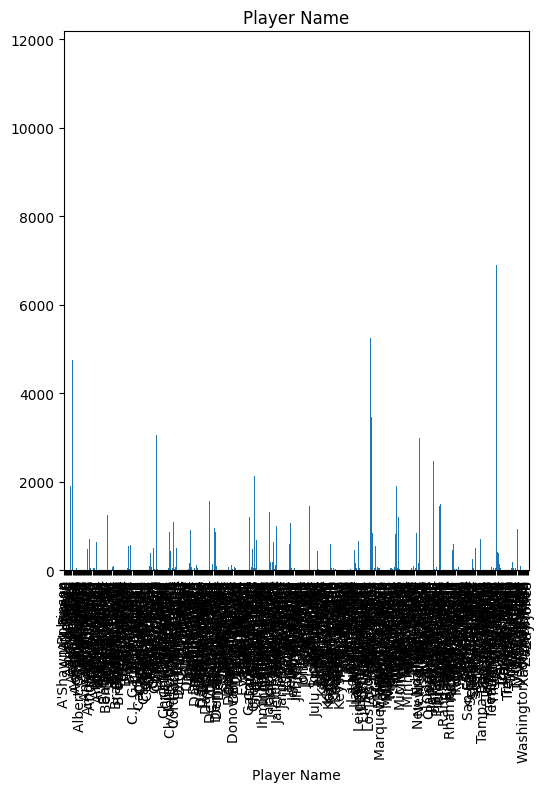

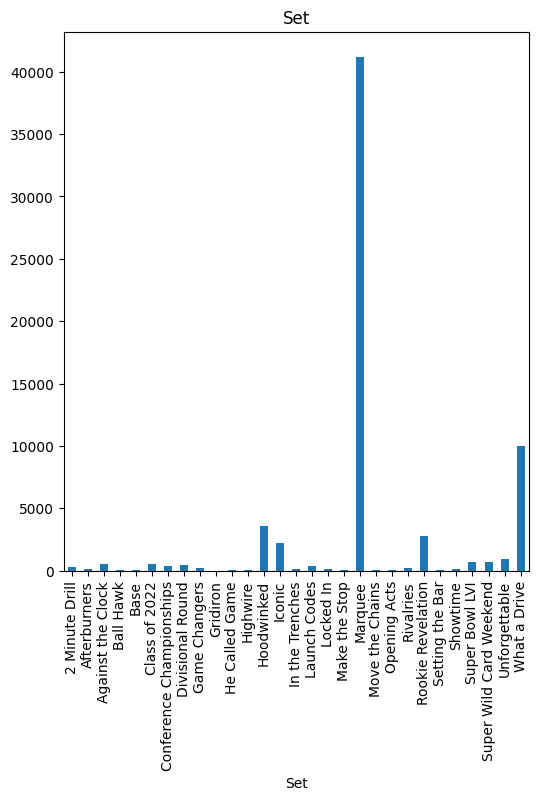

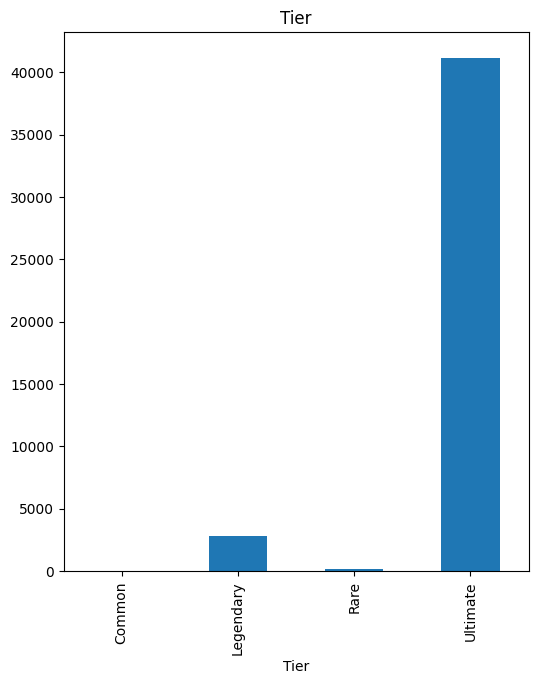

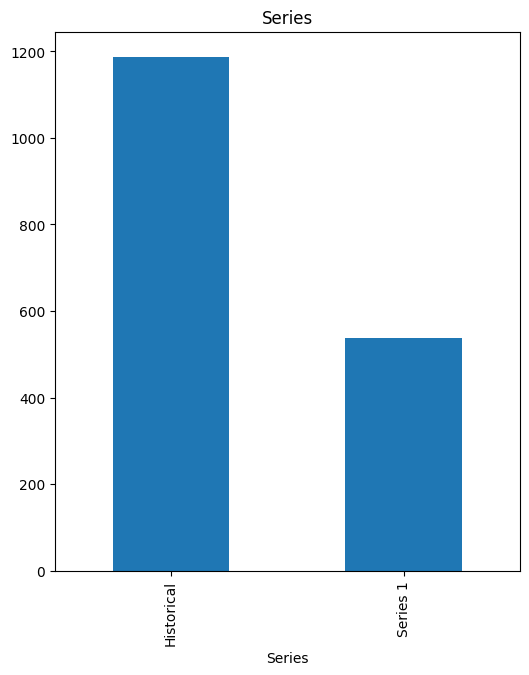

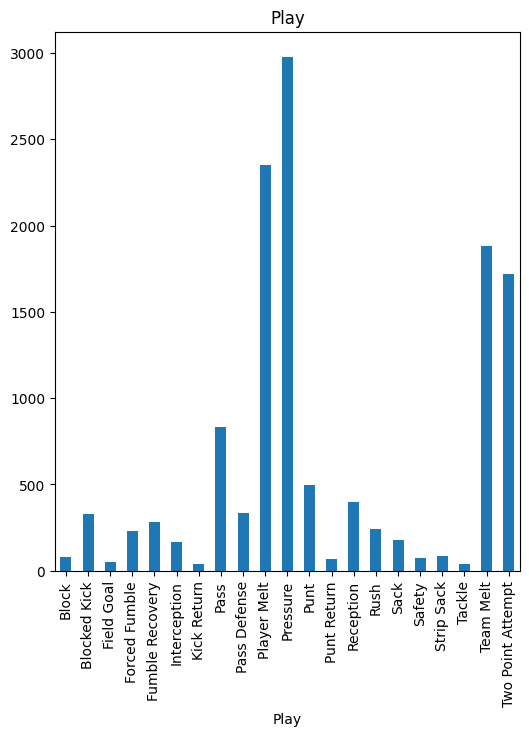

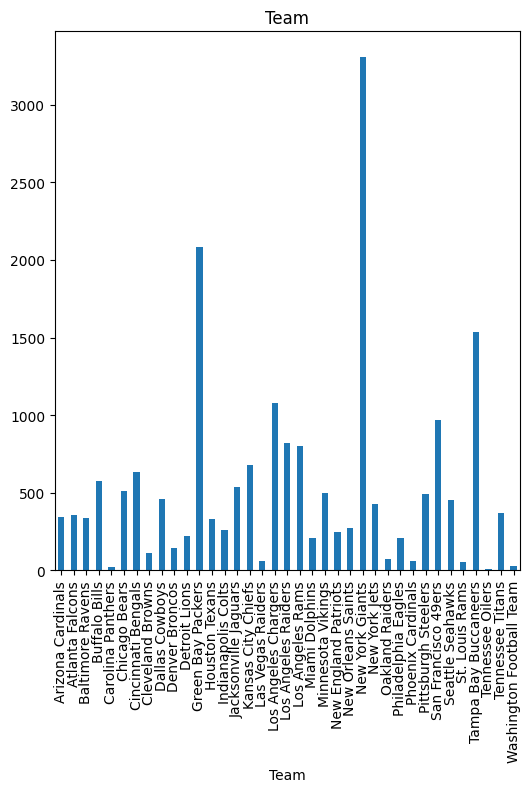

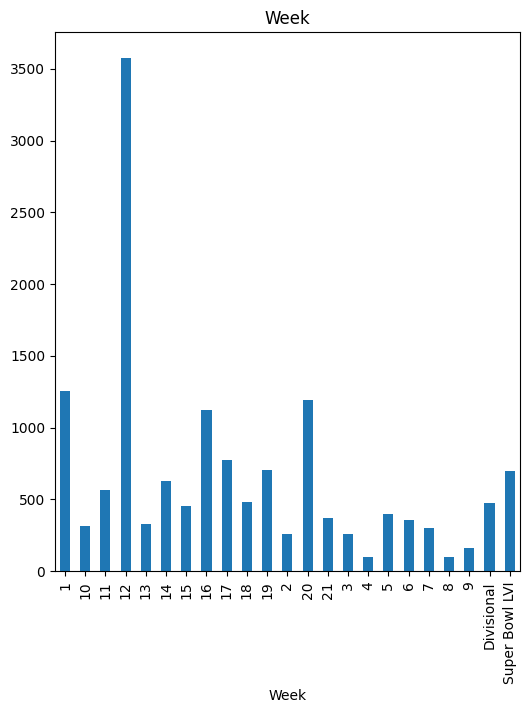

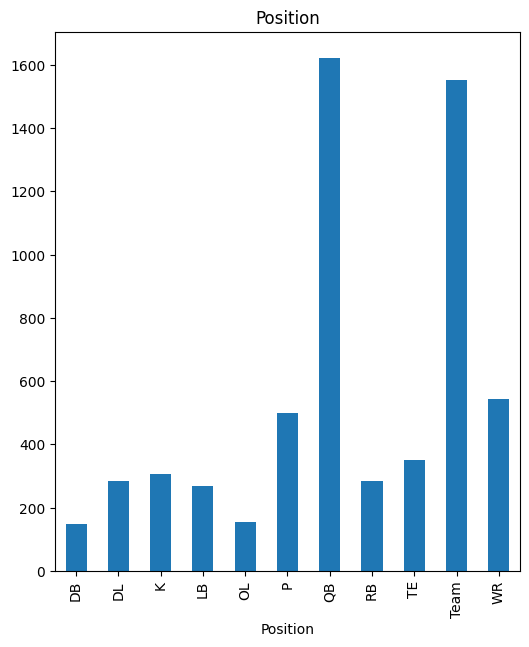

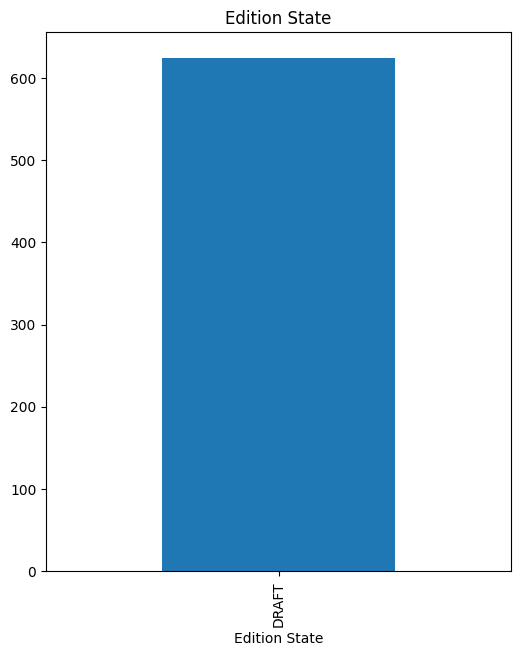

In [140]:
for x in cat_data.columns:
    num_data['Low Ask'].groupby(cat_data[x]).mean().plot(kind='bar')
    plt.title(x)
    plt.show()

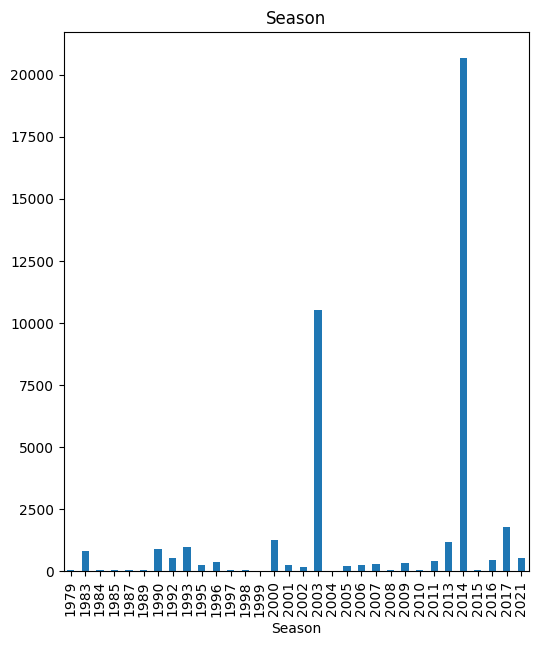

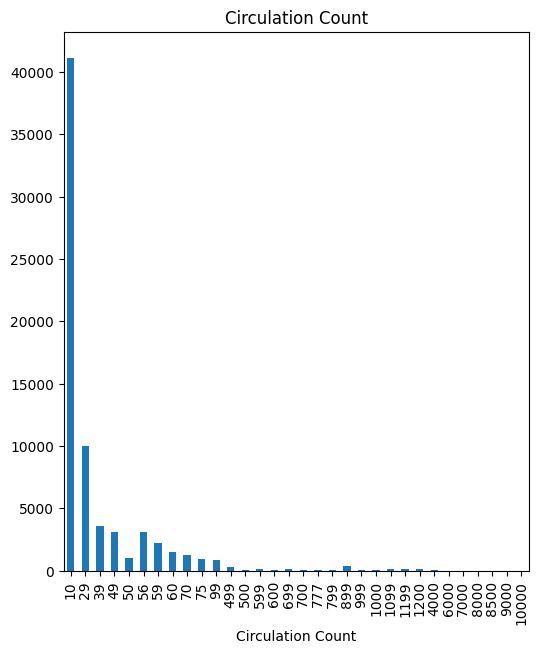

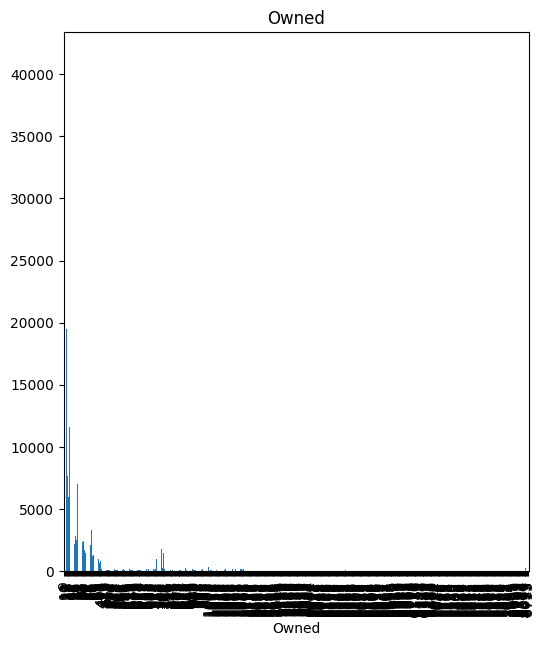

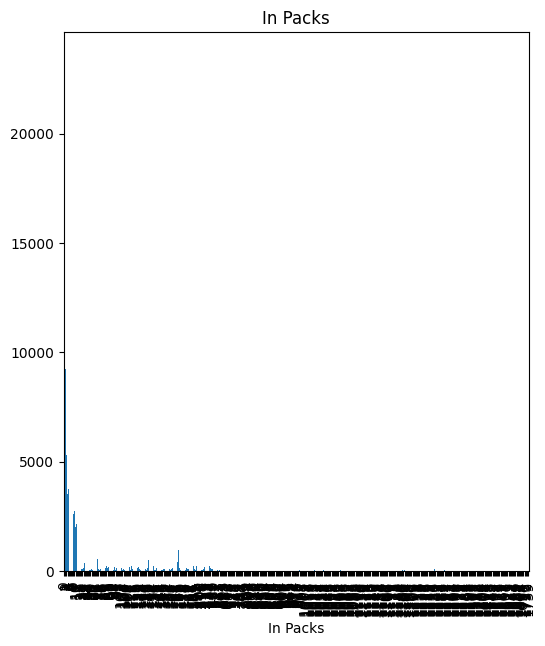

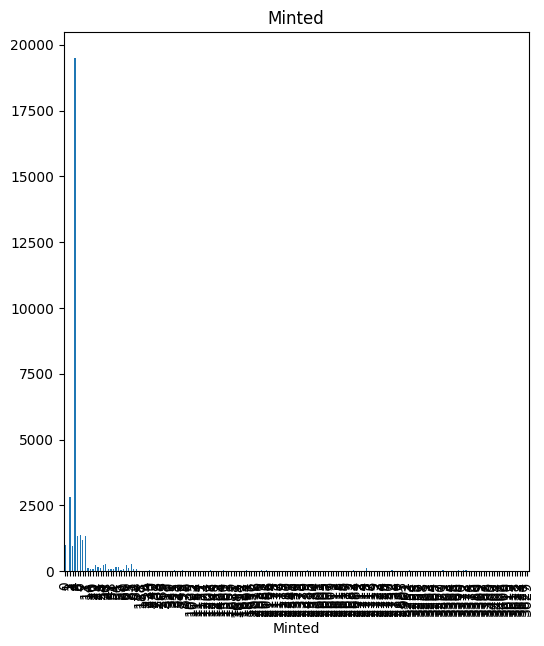

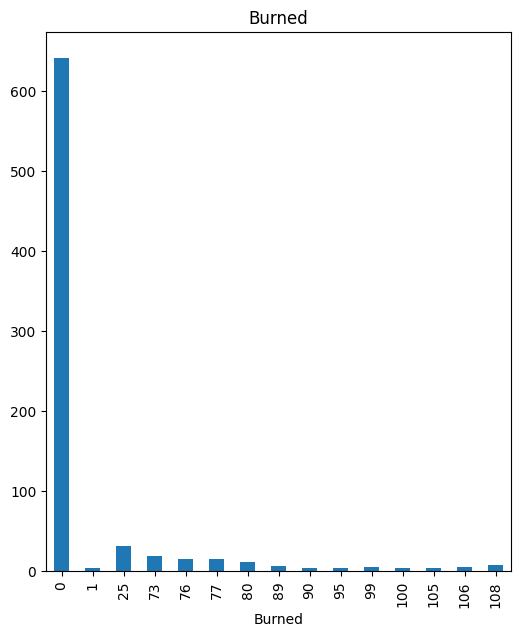

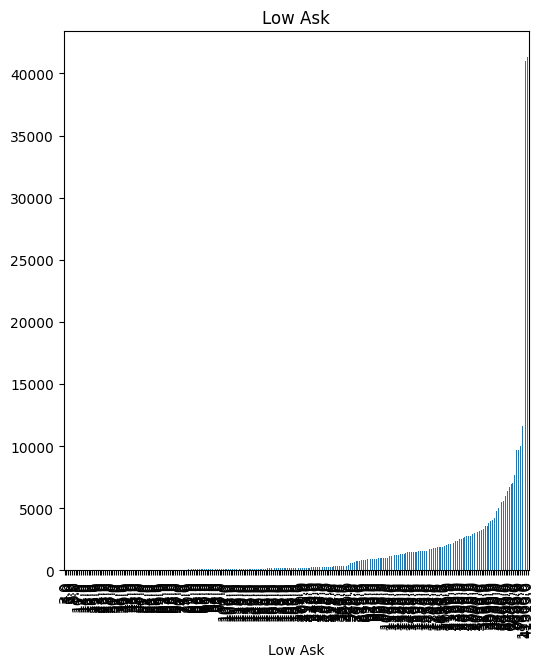

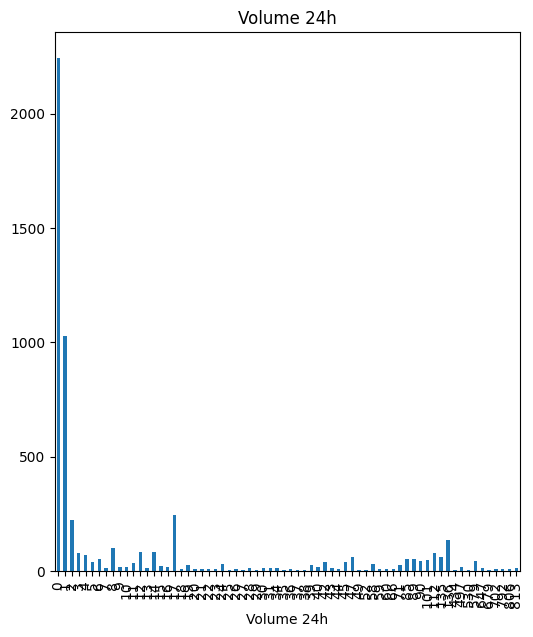

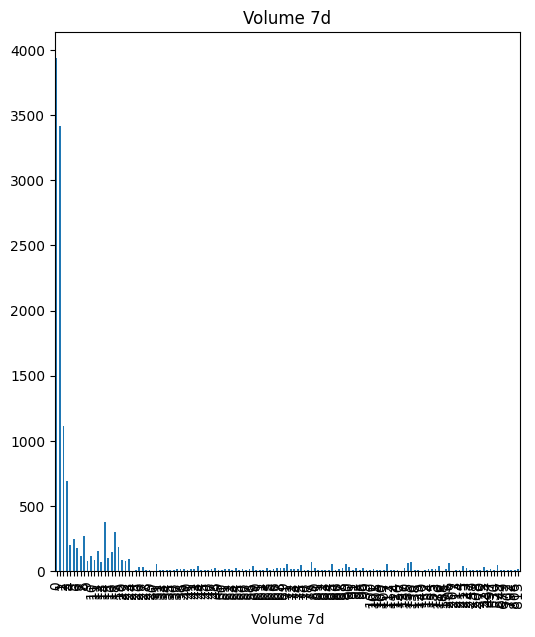

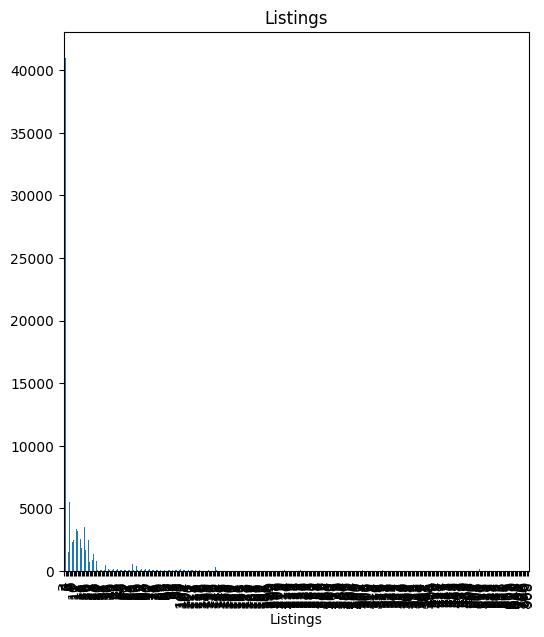

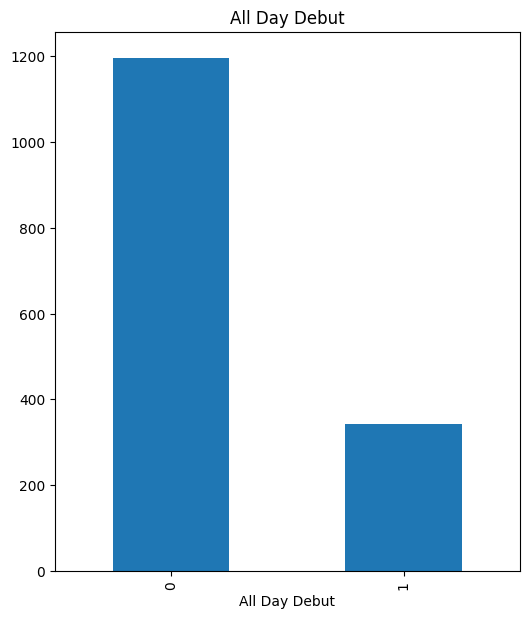

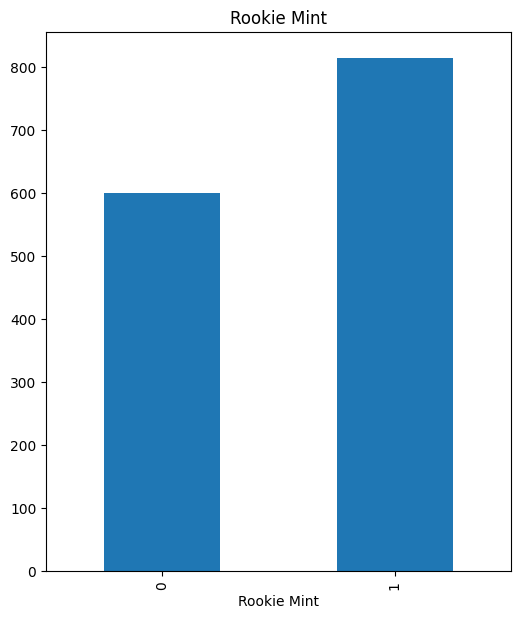

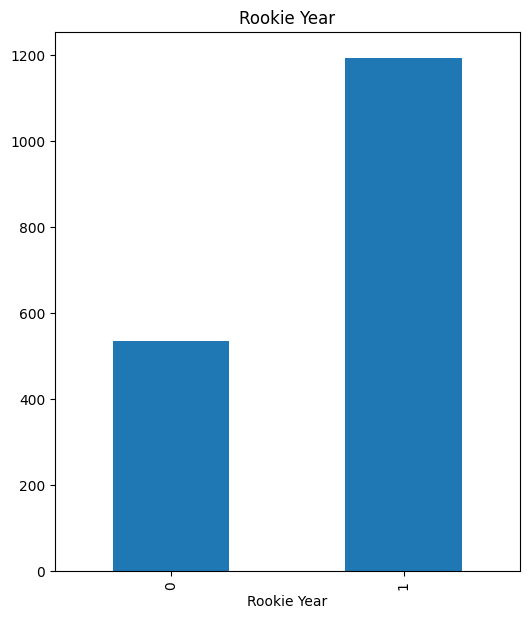

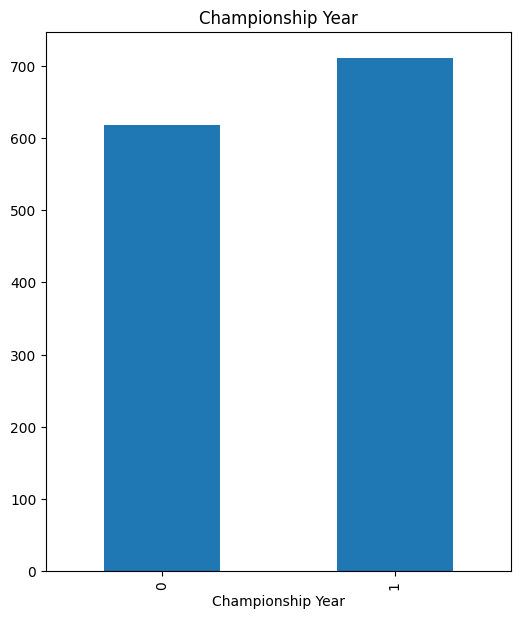

In [141]:
for x in num_data.columns:
    num_data['Low Ask'].groupby(num_data[x]).mean().plot(kind='bar')
    plt.title(x)
    plt.show()

**Now to observe the correlation between all the numericals values**

<AxesSubplot:>

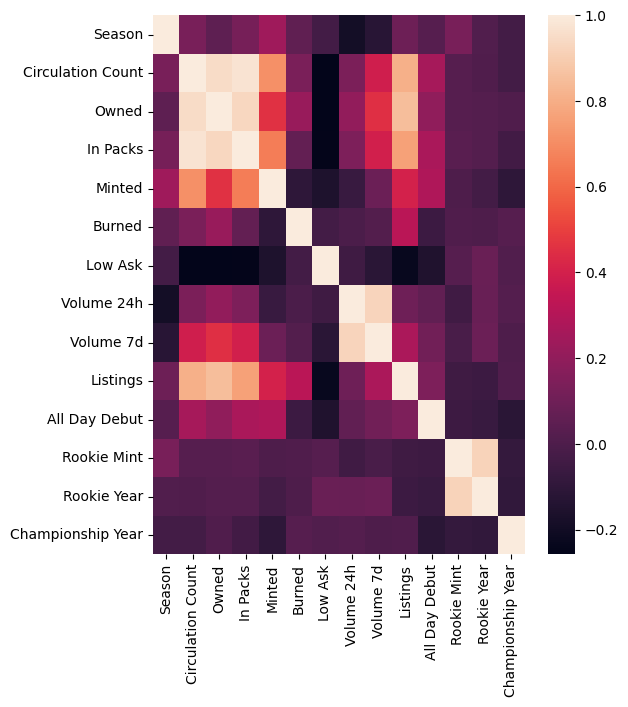

In [142]:
corr = num_data.corr()
sns.heatmap(corr)

   ### **Insight 1) Rarity Tier is a top indicator of price**
    - When looking at the average low ask per 'Tier', it is overwhelmingly apparent that Tier is a driving factor for price. So much so that I will need to filter the data set by tier in order to investigate additional contributors.
    
   **Other takeaways**
   
    -There are a few highly coorelated numerical variables such as 'Volume 24h' with 'Volume 7d', 'Circulation Count' with 'Owned' and 'In Packs', as well as the badges 'Rookie Mint' with 'Rookie year'. Continuing with this analysis it makes sense to only look at one of each. 
    -'Edition State' only has one unique value and therefore can be dropped

# More Pre-processing and Feature Engineering

In [143]:
raw_data.drop('Edition State', axis=1, inplace=True)
raw_data.columns

Index(['Time Stamp (EST)', 'Player Name', 'Set', 'Tier', 'Series', 'Play',
       'Team', 'Week', 'Season', 'Position', 'Circulation Count', 'Owned',
       'In Packs', 'Minted', 'Burned', 'Low Ask', 'Volume 24h', 'Volume 7d',
       'Listings', 'All Day Debut', 'Rookie Mint', 'Rookie Year',
       'Championship Year'],
      dtype='object')

In [144]:
raw_data[raw_data['Rookie Year']!= raw_data['Rookie Mint']]

,Time Stamp (EST),Player Name,Set,Tier,Series,Play,Team,Week,Season,Position,...,Minted,Burned,Low Ask,Volume 24h,Volume 7d,Listings,All Day Debut,Rookie Mint,Rookie Year,Championship Year
114,2022-09-02 12:08,Roy Williams,Rivalries,Common,Historical,Reception,Detroit Lions,1,2004,WR,...,0,0,6.0,20,71,267,1,0,1,0
164,2022-09-02 12:08,Patrick Peterson,Against the Clock,Common,Historical,Punt Return,Arizona Cardinals,9,2011,DB,...,0,0,7.0,434,434,229,0,0,1,0
217,2022-09-02 12:08,Chris Miller,Opening Acts,Common,Historical,Pass,Atlanta Falcons,16,1987,QB,...,0,0,10.0,27,55,160,1,0,1,0
260,2022-09-02 12:08,Michael Thomas,Gridiron,Common,Historical,Reception,New Orleans Saints,12,2016,WR,...,0,0,15.0,813,813,250,1,0,1,0
279,2022-09-02 12:08,Lance Briggs,Opening Acts,Common,Historical,Interception,Chicago Bears,14,2003,LB,...,0,0,17.0,19,37,164,1,0,1,0
288,2022-09-02 12:08,Steve Smith Sr.,Opening Acts,Common,Historical,Kick Return,Carolina Panthers,1,2001,WR,...,0,0,19.0,497,497,180,1,0,1,0
332,2022-09-02 12:08,Reggie White,Opening Acts,Common,Historical,Sack,Philadelphia Eagles,4,1985,DL,...,0,0,41.0,16,41,158,1,0,1,0
336,2022-09-02 12:08,Davante Adams,Opening Acts,Common,Historical,Reception,Green Bay Packers,19,2014,WR,...,0,0,44.0,579,579,210,0,0,1,0
554,2022-09-02 12:08,Terrell Davis,Rookie Revelation,Legendary,Historical,Rush,Denver Broncos,13,1995,RB,...,0,0,700.0,0,1,19,0,0,1,0
559,2022-09-02 12:08,Julio Jones,Rookie Revelation,Legendary,Historical,Player Melt,Atlanta Falcons,9,2011,WR,...,0,0,843.0,14,14,36,0,0,1,0


   ### **Insight 2) Not all badges effect value**

**It is worth noting that intuitively the extra rookie badge should increase the moment's value, however due to the heavy coorelation we can determine that it provides no additional value.**

Since every instance of 'Rookie Mint' is accounted for by 'Rookie Year' we will ignore 'Rookie Mint'

We can use a similar logic to conclude since every instance of the 24 hour volume is included in the 7 day volume, we can ignore 24 hr volume

In [145]:
#Updating our variable lists that we are using
cat_data = raw_data[['Player Name','Set','Tier','Series','Play','Team','Week','Position']]
num_data = raw_data[['Season','Circulation Count','Owned','In Packs','Minted','Burned','Low Ask','Volume 7d','Listings','All Day Debut','Rookie Year','Championship Year']]

I want to combine 'Circulation Count' 'Owned' and 'In Packs' into a single variable to eliminate coorelation issues. In order to do this I will ignore 'In packs' from my variable list and find 'Amount Available' by simply looking at 'Owned' vs 'Circulation Count'

In [146]:
raw_data['Amount Available'] = raw_data['Owned']/raw_data['Circulation Count']
raw_data['Amount Available']

2      0.560400
3      0.607100
4      0.505100
5      0.795400
6      0.560000
         ...   
660    0.928571
661    0.896552
662    0.793103
663    0.900000
664    1.000000
Name: Amount Available, Length: 663, dtype: float64

In [147]:
num_data = raw_data[['Season','Amount Available','Minted','Burned','Low Ask','Volume 7d','Listings','All Day Debut','Rookie Year','Championship Year']]

**Now let's start to examine things again, but since we already determined that 'Tier' was a strong price indicator, let's look closer at Tier before moving forward.**

C:\Users\Tonyj\anaconda3\envs\env_allDay\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


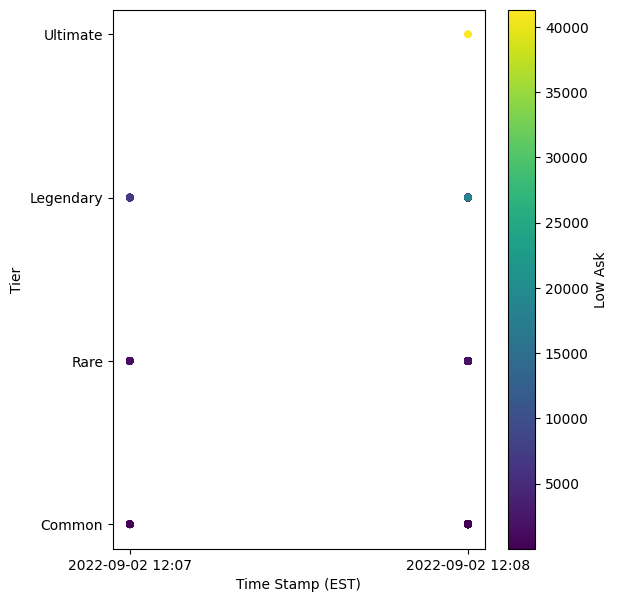

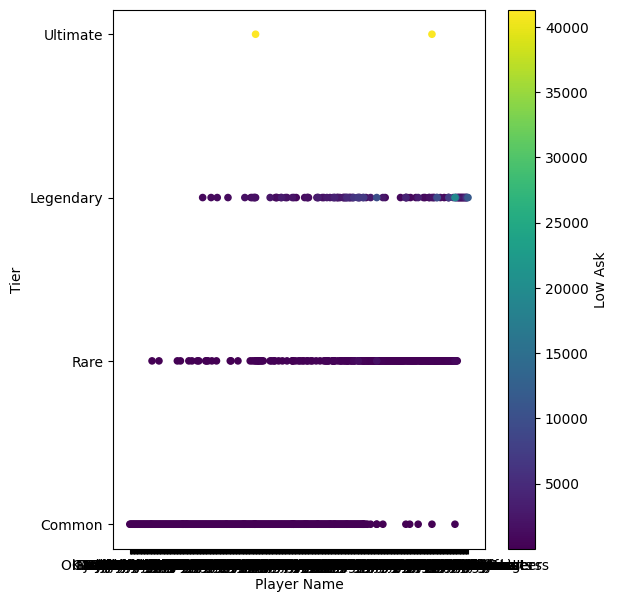

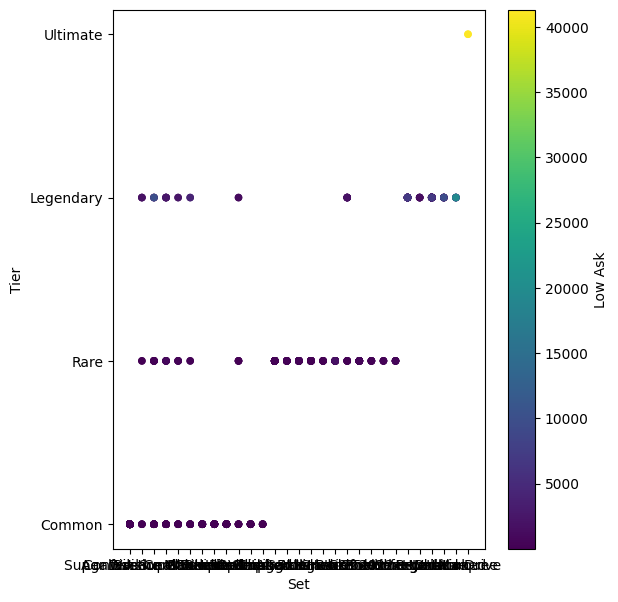

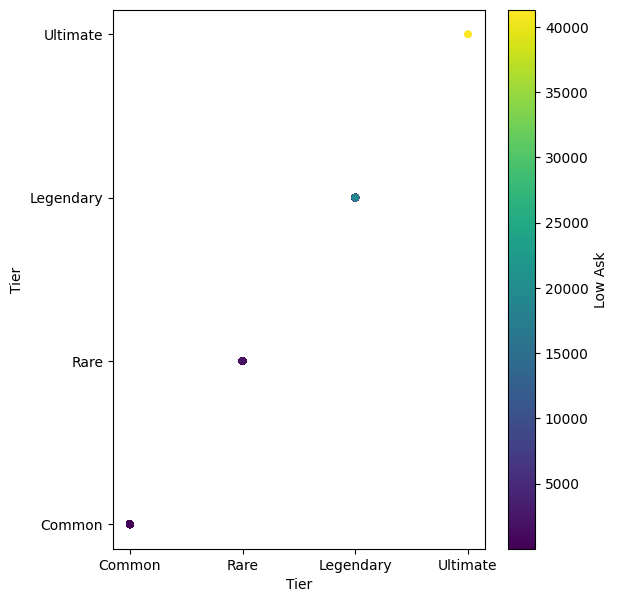

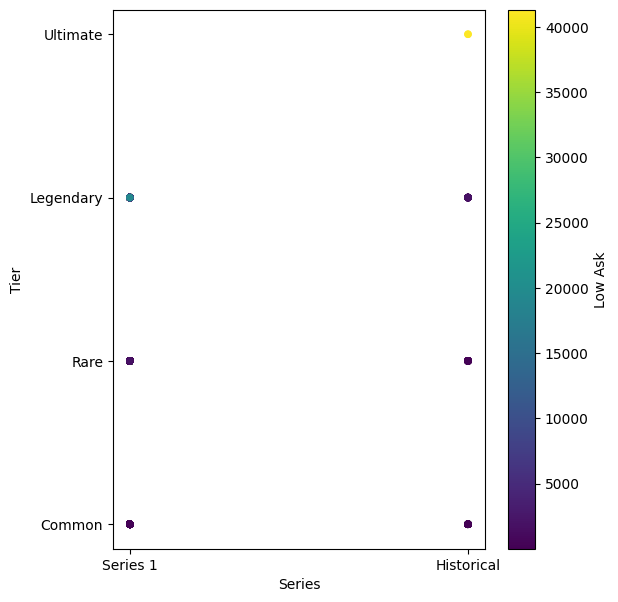

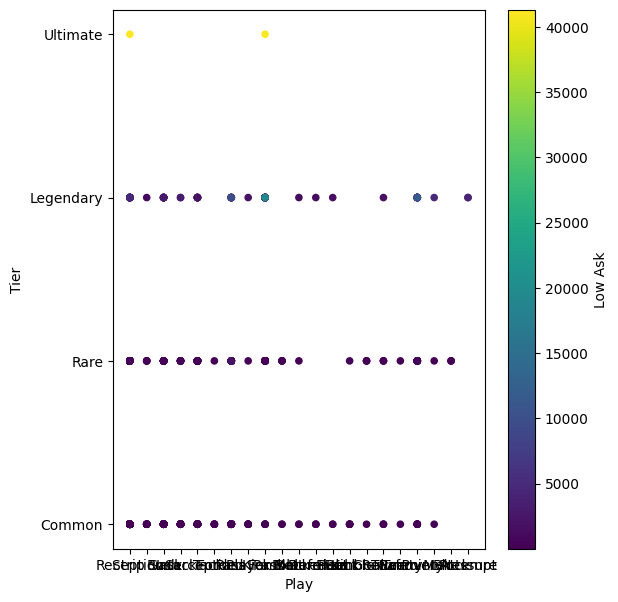

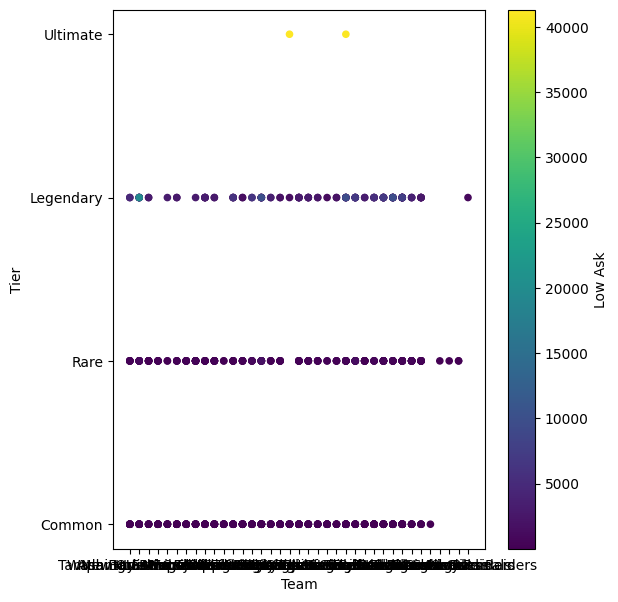

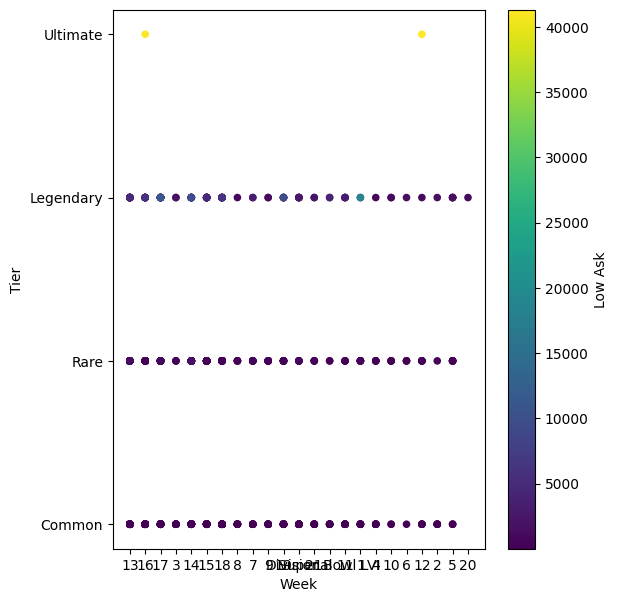

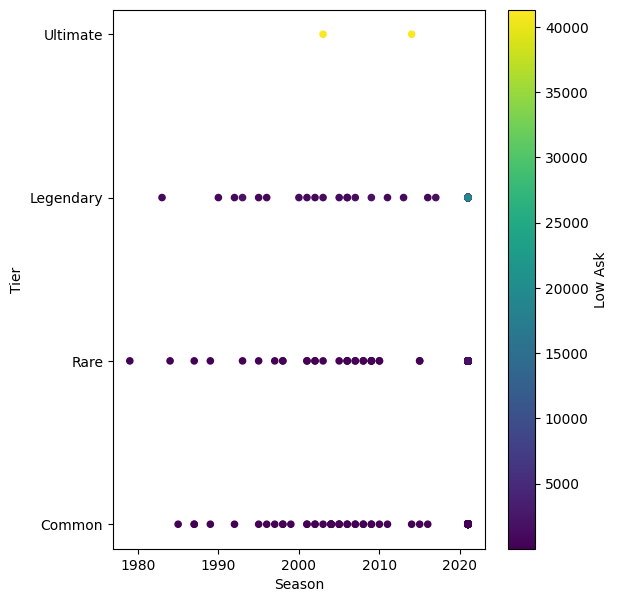

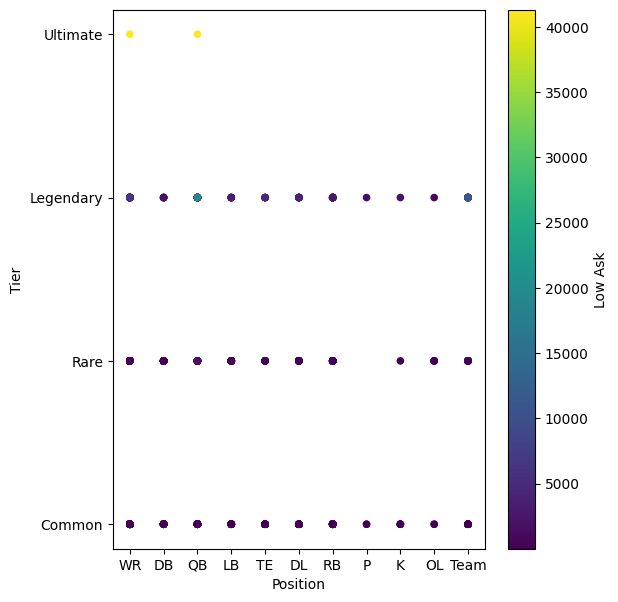

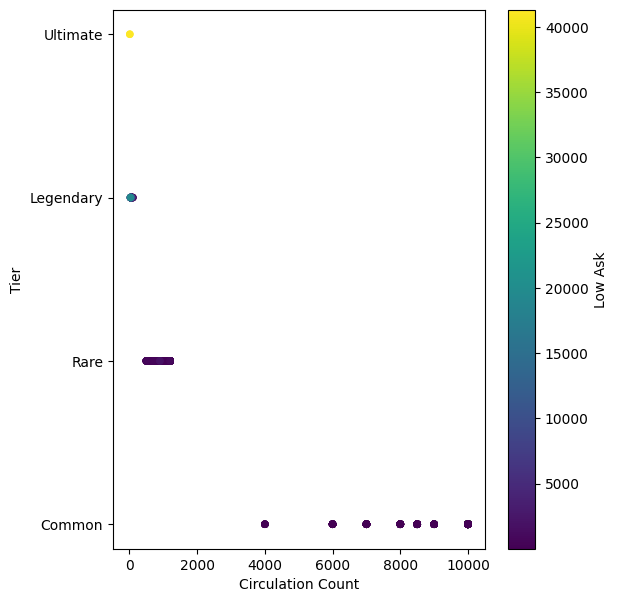

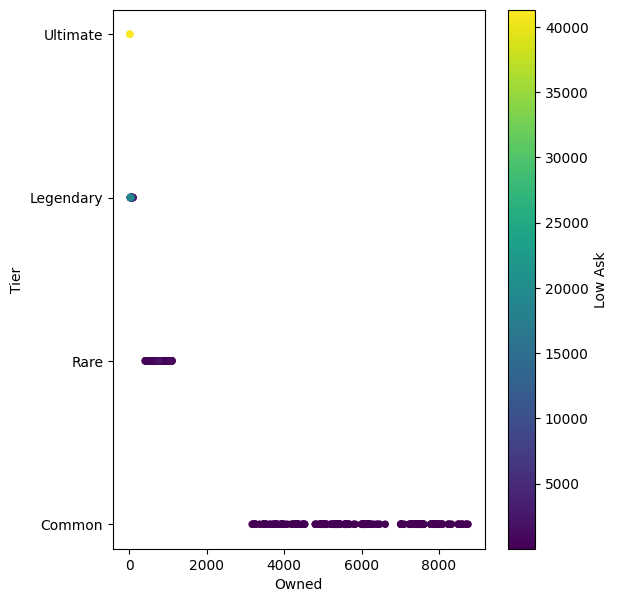

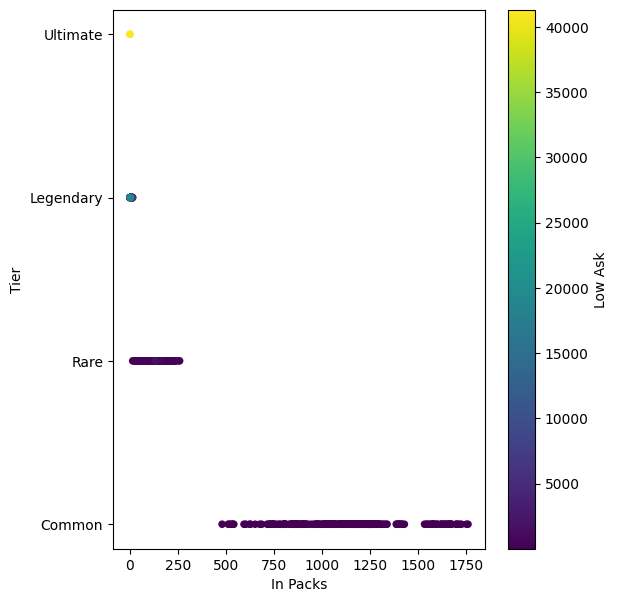

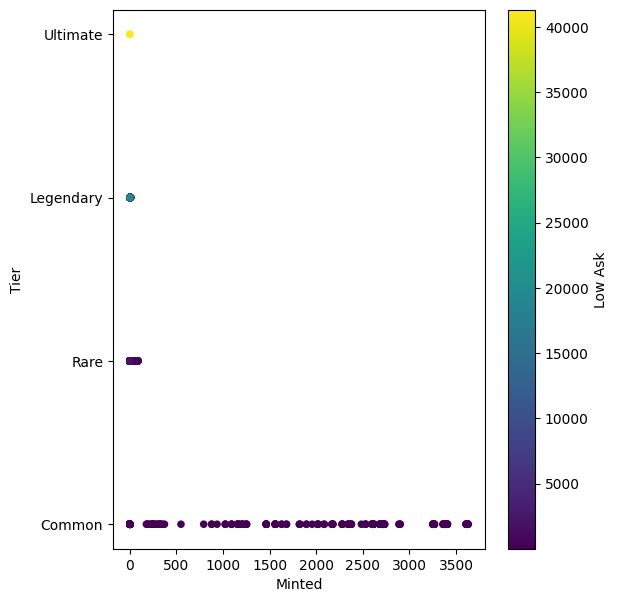

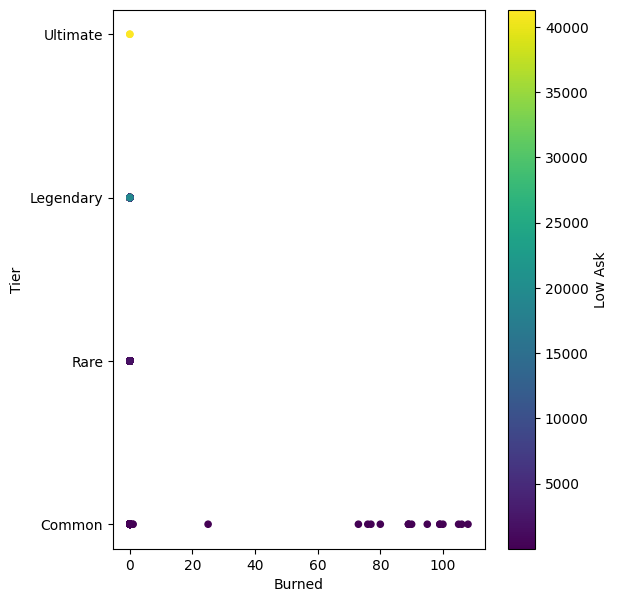

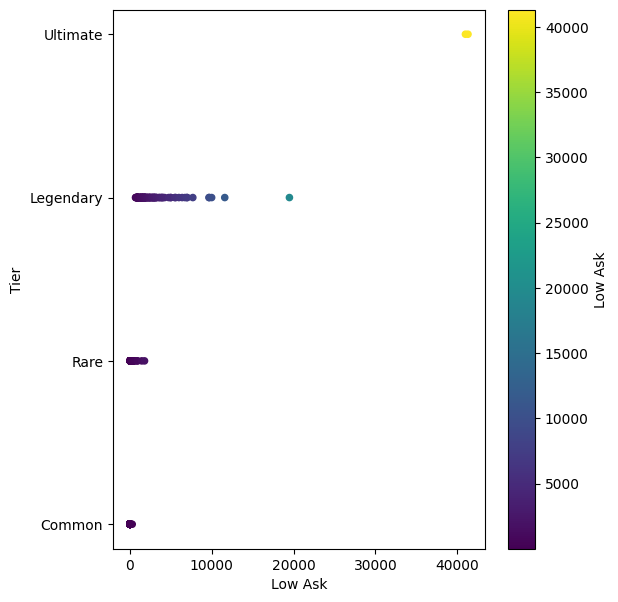

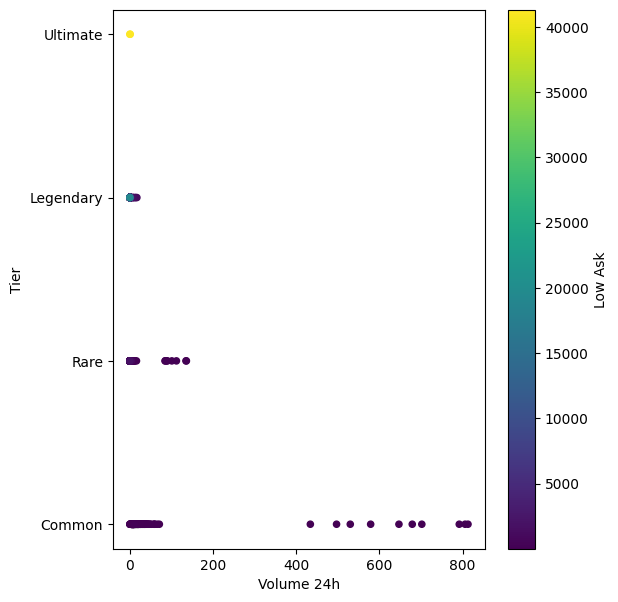

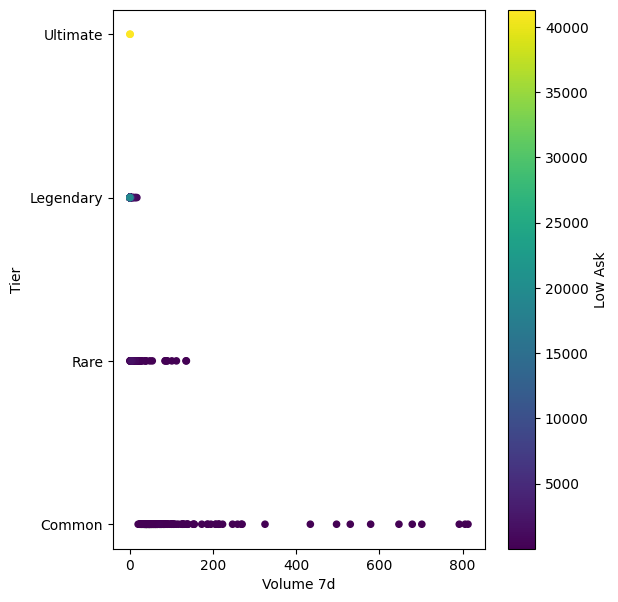

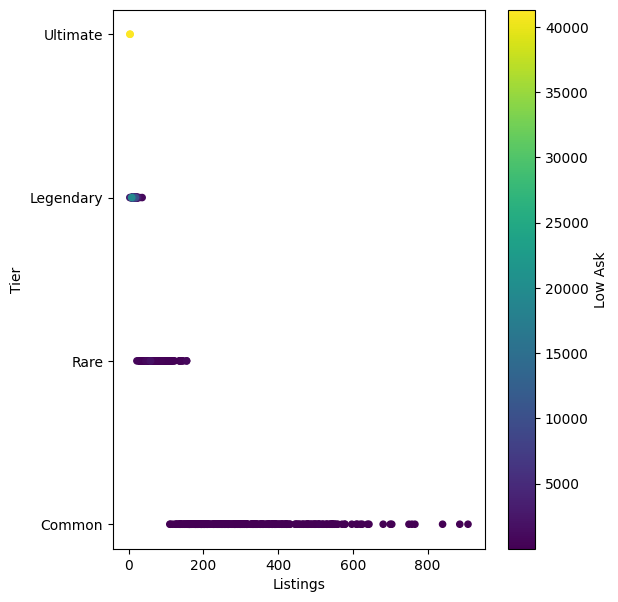

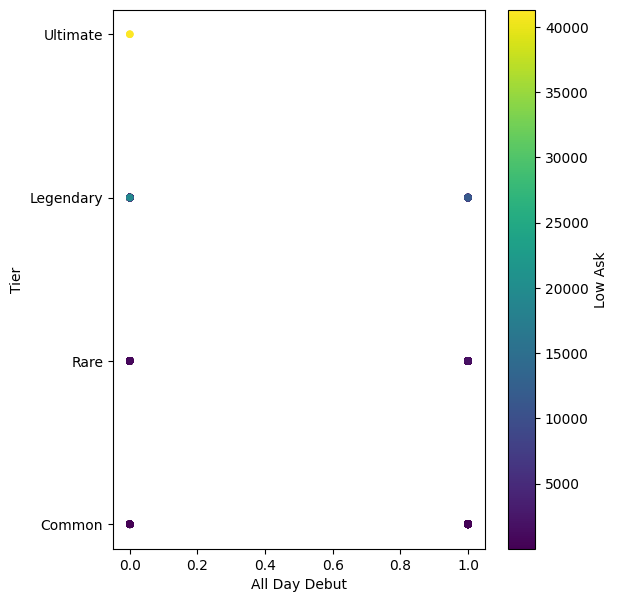

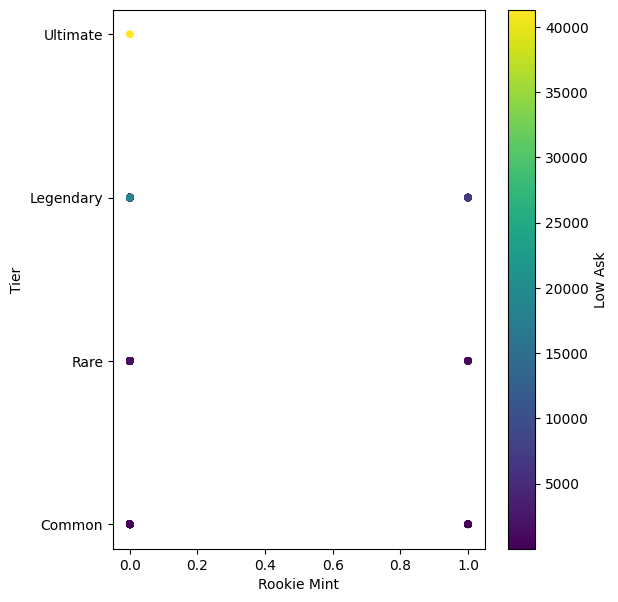

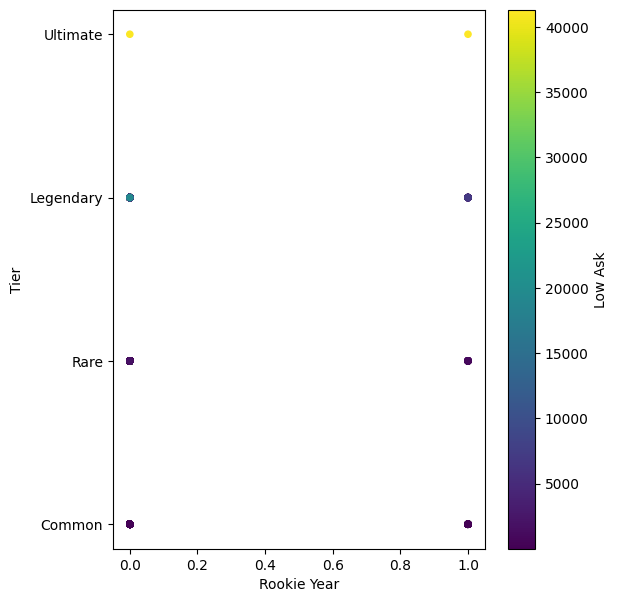

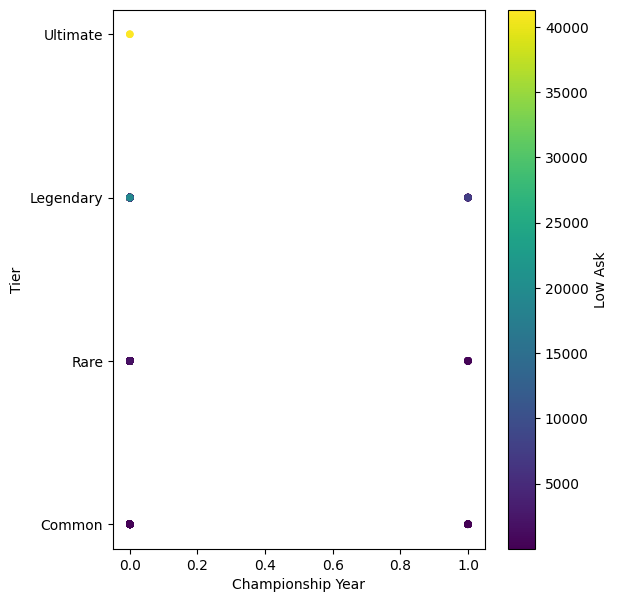

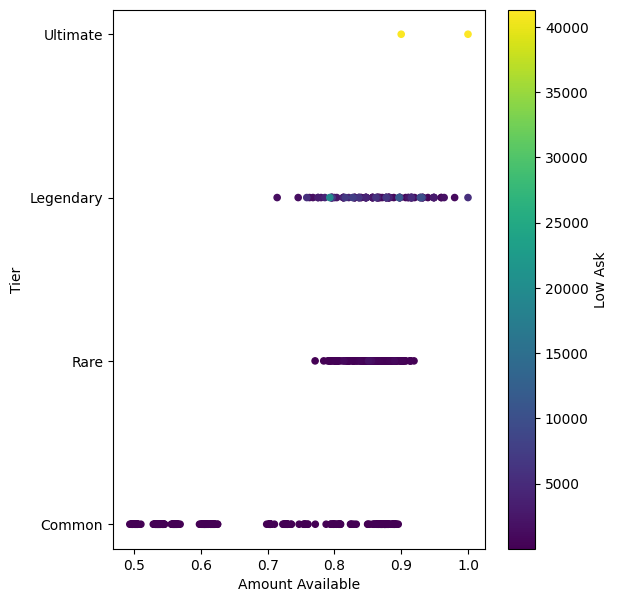

In [148]:
# Render our plots inline
%matplotlib inline
for row in raw_data.columns:
    raw_data.plot.scatter(x=row, y='Tier', c='Low Ask', colormap='viridis')

## Insight 3)

**Observing the relationship between Tier, Circulation Count, and Price there is more confirmation that Tier has an impact on price. However, Circulation count is directly coorelated with Tier and each Tier has multiple Circulation Counts. Therefore Circulation Count is a better indicator of Price than Tier alone!**

In [149]:
raw_data.groupby('Circulation Count').size()

Circulation Count
10         2
29         6
39         8
49        18
50         6
56        13
59        41
60         3
70         2
75         5
99         3
499        6
500        6
599        4
600        2
699       21
700        4
777        7
799       23
899       19
999       26
1000      11
1099       7
1199      58
1200      20
4000       7
6000      21
7000      37
8000      32
8500      45
9000      21
10000    179
dtype: int64

**Let's narrow the focus to moments with only 10,000 Circulation count sinc it contains the largest sample size**

In [150]:
high_circulation_data = raw_data[raw_data['Circulation Count']==10000]
high_circulation_data

,Time Stamp (EST),Player Name,Set,Tier,Series,Play,Team,Week,Season,Position,...,Burned,Low Ask,Volume 24h,Volume 7d,Listings,All Day Debut,Rookie Mint,Rookie Year,Championship Year,Amount Available
2,2022-09-02 12:07,Olamide Zaccheaus,Base,Common,Series 1,Reception,Atlanta Falcons,13,2021,WR,...,0,3.0,7,60,409,1,0,0,0,0.5604
3,2022-09-02 12:08,Cyril Grayson,Base,Common,Series 1,Reception,Tampa Bay Buccaneers,16,2021,WR,...,0,3.0,18,82,517,1,0,0,0,0.6071
4,2022-09-02 12:08,P.J. Williams,Base,Common,Series 1,Strip Sack,New Orleans Saints,17,2021,DB,...,0,3.0,18,65,334,1,0,0,0,0.5051
5,2022-09-02 12:08,Taylor Heinicke,Base,Common,Series 1,Rush,Washington Football Team,3,2021,QB,...,0,3.0,20,127,210,1,0,0,0,0.7954
6,2022-09-02 12:07,Kamu Grugier-Hill,Base,Common,Series 1,Sack,Houston Texans,13,2021,LB,...,0,4.0,2,46,500,1,0,0,0,0.5600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
424,2022-09-02 12:08,Justin Jefferson,Base,Common,Series 1,Reception,Minnesota Vikings,15,2021,WR,...,0,70.0,10,79,256,1,0,0,0,0.7566
438,2022-09-02 12:07,Joe Burrow,Base,Common,Series 1,Pass,Cincinnati Bengals,14,2021,QB,...,0,82.0,8,63,266,1,0,0,0,0.5388
469,2022-09-02 12:08,Ja'Marr Chase,Base,Common,Series 1,Reception,Cincinnati Bengals,16,2021,WR,...,0,104.0,9,59,304,1,1,1,0,0.6043
475,2022-09-02 12:07,Josh Allen,Base,Common,Series 1,Rush,Buffalo Bills,14,2021,QB,...,0,109.0,15,75,196,1,0,0,0,0.5362


**Now that I have a more focused subset of data, I want to see if a players position and/or Badge Type makes an impact on the price**

<AxesSubplot:xlabel='Position', ylabel='Low Ask'>

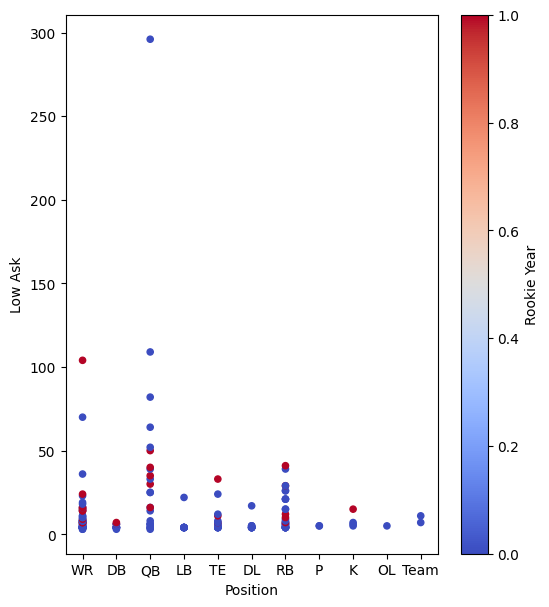

In [151]:
high_circulation_data.plot.scatter(x='Position',y='Low Ask', c='Rookie Year', colormap='coolwarm')

## Insight 4)

**There are some positions that appear more valuable than others such as QB, WR, and TE. Defensive positions tend to have a lower price ceiling.**

I want to quickly explore the outlier before moving forward

In [152]:
raw_data[(raw_data['Circulation Count']==10000) & (raw_data['Low Ask']>200)]

,Time Stamp (EST),Player Name,Set,Tier,Series,Play,Team,Week,Season,Position,...,Burned,Low Ask,Volume 24h,Volume 7d,Listings,All Day Debut,Rookie Mint,Rookie Year,Championship Year,Amount Available
541,2022-09-02 12:07,Tom Brady,Base,Common,Series 1,Pass,Tampa Bay Buccaneers,14,2021,QB,...,0,296.0,11,71,510,1,0,0,0,0.8614


**Oh, the outlier that was priced well above the others is a Tom Brady Moment! That makes sense, he is the GOAT**

**Let's Continue...**

<AxesSubplot:xlabel='Position', ylabel='Low Ask'>

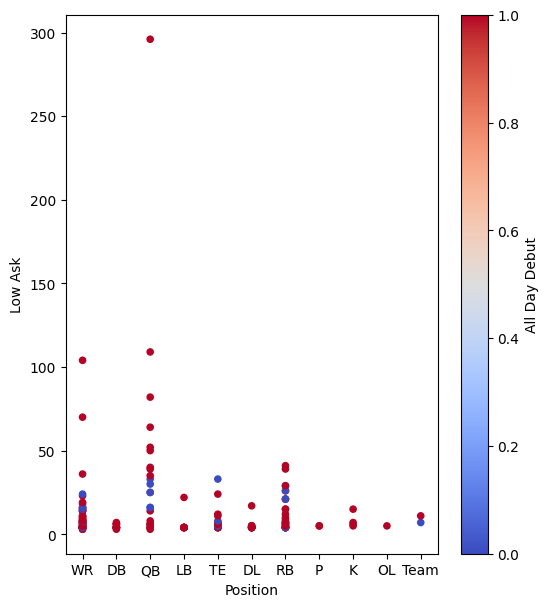

In [153]:
high_circulation_data.plot.scatter(x='Position',y='Low Ask', c='All Day Debut', colormap='coolwarm')

<AxesSubplot:xlabel='Position', ylabel='Low Ask'>

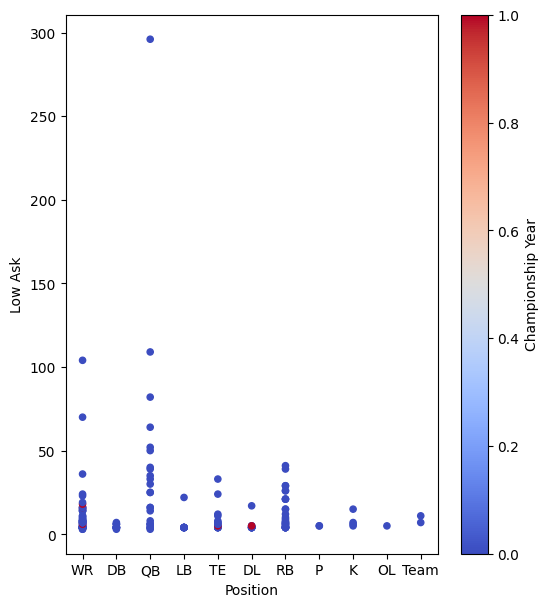

In [154]:
high_circulation_data.plot.scatter(x='Position',y='Low Ask', c='Championship Year', colormap='coolwarm')

## Insight 5)

**For every position, the highest priced moments are those that have the badge 'All Day Debut'.I can conclude that any moment with the 'All Day Debut' badge carriers a premium in the market**

**The Championship Year Badge either does not carry a premium, or there is not a large enough sample size to make a conclusion yet**